## Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib as mpl
from pathlib import Path

In [3]:
awards = pd.read_csv("project_data/awards_players.csv")
coaches = pd.read_csv(Path("project_data", "coaches.csv"))
players_teams = pd.read_csv(Path("project_data", "players_teams.csv"))
players = pd.read_csv(Path("project_data", "players.csv"))
series_post = pd.read_csv(Path("project_data", "series_post.csv"))
teams_post = pd.read_csv(Path("project_data", "teams_post.csv"))
teams = pd.read_csv(Path("project_data", "teams.csv"))

### 1. Search for irrelevant attributes/features

#### Awards Table

In [4]:
# Count of different lgIDs
print("Count of different lgIDs:")
print(awards['lgID'].value_counts())
print("\n")
# All lgIDs are the same, so we can assume they are irrelevant to our analysis

Count of different lgIDs:
lgID
WNBA    95
Name: count, dtype: int64




#### Coaches Table

In [5]:
# Count of different lgIDs
print("Count of different lgIDs:")
print(coaches['lgID'].value_counts())
print("\n")
# All lgIDs are the same, so we can assume they are irrelevant to our analysis

Count of different lgIDs:
lgID
WNBA    162
Name: count, dtype: int64




#### Players Teams Table

In [6]:
# Count of different lgIDs
print("Count of different lgIDs:")
print(players_teams['lgID'].value_counts())
print("\n")
# All lgIDs are the same, so we can assume they are irrelevant to our analysis

Count of different lgIDs:
lgID
WNBA    1876
Name: count, dtype: int64




#### Players Table

In [7]:
# Player firstSeason and lastSeason Distribution
print("Value Distribution of firstseason")
print(players['firstseason'].value_counts())
print("\n")

print("Value Distribution of lastseason")
print(players['lastseason'].value_counts())
print("\n")

# Devemos preencher estes valores de alguma forma. Podemos olhar para o primeiro ano em que jogaram na tabela players_teams para firstSeason...

# Player Death Date Distribution 0000-00-00 vs not 0000-00-00 (0000-00-00 means alive)
print("Value Distribution of deathDate")
print(players['deathDate'].value_counts())
print("\n")

# Player collegeOther Distribution NULL vs NOT NULL
print("Value Distribution of collegeOther")
print(players['collegeOther'].isnull().value_counts())

Value Distribution of firstseason
firstseason
0    893
Name: count, dtype: int64


Value Distribution of lastseason
lastseason
0    893
Name: count, dtype: int64


Value Distribution of deathDate
deathDate
0000-00-00    889
2011-05-27      1
1999-08-19      1
1999-01-18      1
2001-05-12      1
Name: count, dtype: int64


Value Distribution of collegeOther
collegeOther
True     882
False     11
Name: count, dtype: int64


#### Series Post, Teams_Post and Teams

In [8]:
# Count of different lgIDs in series_post
print("Count of different lgIDs in series_post:")
print(series_post['lgIDWinner'].value_counts())
print(series_post['lgIDLoser'].value_counts())
print("\n")

# Count of different lgIDs in teams_post
print("Count of different lgIDs in teams_post:")
print(teams_post['lgID'].value_counts())
print("\n")

# Count of different lgIDs in teams
print("Count of different lgIDs in teams:")
print(teams['lgID'].value_counts())
# All lgIDs are the same, so we can assume they are irrelevant to our analysis

Count of different lgIDs in series_post:
lgIDWinner
WNBA    70
Name: count, dtype: int64
lgIDLoser
WNBA    70
Name: count, dtype: int64


Count of different lgIDs in teams_post:
lgID
WNBA    80
Name: count, dtype: int64


Count of different lgIDs in teams:
lgID
WNBA    142
Name: count, dtype: int64


List of rookies (by year):

In [9]:
rookies_by_year = {}
min_year = players_teams['year'].min()
max_year = players_teams['year'].max()
previous_years_players = set()

for year in range(min_year + 1,max_year + 1):
    current_years = players_teams[players_teams['year'] == year]
    current_years_players = set(current_years['playerID'])

    rookies = current_years_players - previous_years_players
    rookies_by_year[year] = rookies

    previous_years_players.update(current_years_players)

for year, rookies in rookies_by_year.items():
    print(f"Year: {year}")
    print(f"Rookies: {rookies}")

Year: 2
Rookies: {'reddja01w', 'clinest01w', 'torniel01w', 'dickeke01w', 'jacksta02w', 'feastal01w', 'pridely01w', 'lennobe01w', 'williad01w', 'wyckobr01w', 'goodsad01w', 'palmewe01w', 'iveyni01w', 'penicti01w', 'smithch03w', 'torrele01w', 'vealkr01w', 'staleda01w', 'nemcoev01w', 'schwege01w', 'willina01w', 'wolvean01w', 'brazian01w', 'bristre01w', 'andrame01w', 'erbsu01w', 'smithch02w', 'stinsan01w', 'barksla01w', 'mabikmw01w', 'walsema01w', 'santoal01w', 'wynneda01w', 'nolande01w', 'bullevi01w', 'shakiel01w', 'blodgci01w', 'stileja01w', 'jonesme01w', 'williwe01w', 'johnsti01w', 'harrili01w', 'wolteka01w', 'dossaci01w', 'phillta01w', 'timmsmi01w', 'darlihe01w', 'dixonta01w', 'tuvicsl01w', 'whitiva01w', 'powelel01w', 'figgsuk01w', 'scottol01w', 'vodicka01w', 'anderke01w', 'herriam01w', 'beviltu01w', 'schumke01w', 'kingija01w', 'rileyru01w', 'robincr01w', 'spornra01w', 'blackde01w', 'alhalta01w', 'vangomi01w', 'walkede01w', 'hillec01w', 'fordst01w', 'stafftr01w', 'thomast01w', 'gilloje0

### 2. Data Cleaning

#### 2.1 Outlier Detection - Performance Score Analysis

We'll create a comprehensive performance score using multiple basketball statistics and identify outliers by comparing performance efficiency to minutes played.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Filter out players with minimal playing time (less than 100 minutes in a season)
# This removes players who barely played and might skew our analysis
active_players = players_teams[players_teams['minutes'] >= 100].copy()

print(f"Total player-season records: {len(players_teams)}")
print(f"Active players (>= 100 minutes): {len(active_players)}")
print(f"Filtered out {len(players_teams) - len(active_players)} records with minimal playing time")

Total player-season records: 1876
Active players (>= 100 minutes): 1546
Filtered out 330 records with minimal playing time


#### Data Validation and Impossible Outliers Detection

First, let's check for data inconsistencies and impossible values across ALL players (including those with minimal minutes).

In [11]:
# Check for impossible data combinations across ALL players
print("=== DATA VALIDATION OUTLIERS ===\n")

# 1. Players with 0 minutes but have stats (impossible)
zero_minutes_with_stats = players_teams[
    (players_teams['minutes'] == 0) & 
    ((players_teams['points'] > 0) | (players_teams['rebounds'] > 0) | 
     (players_teams['assists'] > 0) | (players_teams['steals'] > 0) | 
     (players_teams['blocks'] > 0) | (players_teams['fgMade'] > 0))
]
print(f"Players with 0 minutes but recorded stats: {len(zero_minutes_with_stats)}")
if len(zero_minutes_with_stats) > 0:
    print(zero_minutes_with_stats[['playerID', 'year', 'tmID', 'minutes', 'points', 'rebounds', 'assists']].head(10))
    print()

# 2. Players with more made shots than attempted (impossible)
impossible_shooting = players_teams[
    (players_teams['fgMade'] > players_teams['fgAttempted']) |
    (players_teams['ftMade'] > players_teams['ftAttempted']) |
    (players_teams['threeMade'] > players_teams['threeAttempted'])
]
print(f"Players with more makes than attempts: {len(impossible_shooting)}")
if len(impossible_shooting) > 0:
    print(impossible_shooting[['playerID', 'year', 'tmID', 'fgMade', 'fgAttempted', 'ftMade', 'ftAttempted']].head(10))
    print()

# 3. Negative values (impossible in basketball)
negative_stats = players_teams[
    (players_teams['points'] < 0) | (players_teams['rebounds'] < 0) | 
    (players_teams['assists'] < 0) | (players_teams['minutes'] < 0) |
    (players_teams['steals'] < 0) | (players_teams['blocks'] < 0)
]
print(f"Players with negative stats: {len(negative_stats)}")
if len(negative_stats) > 0:
    print(negative_stats[['playerID', 'year', 'tmID', 'minutes', 'points', 'rebounds', 'assists']].head(10))
    print()

# 4. Extremely high per-minute rates (likely impossible)
# Calculate rates for ALL players (including those with minimal minutes)
players_teams_copy = players_teams.copy()
players_teams_copy['points_per_min'] = np.where(players_teams_copy['minutes'] > 0, 
                                               players_teams_copy['points'] / players_teams_copy['minutes'], 0)
players_teams_copy['rebounds_per_min'] = np.where(players_teams_copy['minutes'] > 0, 
                                                 players_teams_copy['rebounds'] / players_teams_copy['minutes'], 0)
players_teams_copy['assists_per_min'] = np.where(players_teams_copy['minutes'] > 0, 
                                                players_teams_copy['assists'] / players_teams_copy['minutes'], 0)

# Extremely high rates (these would be nearly impossible in real basketball)
extreme_rates = players_teams_copy[
    (players_teams_copy['points_per_min'] > 2.0) |  # More than 2 points per minute is extremely rare
    (players_teams_copy['rebounds_per_min'] > 1.5) |  # More than 1.5 rebounds per minute is very high
    (players_teams_copy['assists_per_min'] > 1.0)     # More than 1 assist per minute is exceptional
]
print(f"Players with extremely high per-minute rates: {len(extreme_rates)}")
if len(extreme_rates) > 0:
    print("Top extreme rate cases:")
    extreme_display = extreme_rates.nlargest(15, 'points_per_min')[
        ['playerID', 'year', 'tmID', 'minutes', 'points', 'points_per_min', 'rebounds_per_min', 'assists_per_min']
    ]
    print(extreme_display.to_string(index=False))
    print()

=== DATA VALIDATION OUTLIERS ===

Players with 0 minutes but recorded stats: 0
Players with more makes than attempts: 0
Players with negative stats: 0
Players with extremely high per-minute rates: 1
Top extreme rate cases:
  playerID  year tmID  minutes  points  points_per_min  rebounds_per_min  assists_per_min
anderam01w     7  CON        1       0             0.0               2.0              0.0



In [12]:
# 5. Low-minute anomalies (players with very few minutes but exceptional stats)
print("=== LOW-MINUTE ANOMALIES ===\n")

# Players with less than 50 minutes but exceptional performance
low_minute_players = players_teams[
    (players_teams['minutes'] > 0) & (players_teams['minutes'] < 50)
].copy()

if len(low_minute_players) > 0:
    low_minute_players['points_per_min'] = low_minute_players['points'] / low_minute_players['minutes']
    low_minute_players['rebounds_per_min'] = low_minute_players['rebounds'] / low_minute_players['minutes']
    low_minute_players['assists_per_min'] = low_minute_players['assists'] / low_minute_players['minutes']
    
    # Find anomalies among low-minute players
    low_minute_anomalies = low_minute_players[
        (low_minute_players['points_per_min'] > 1.5) |  # Very high scoring rate
        (low_minute_players['rebounds_per_min'] > 1.0) |  # Very high rebounding rate
        (low_minute_players['assists_per_min'] > 0.8) |   # Very high assist rate
        (low_minute_players['points'] > 30)  # High absolute points despite low minutes
    ]
    
    print(f"Low-minute players with anomalous performance: {len(low_minute_anomalies)}")
    if len(low_minute_anomalies) > 0:
        print("Most extreme cases:")
        anomaly_display = low_minute_anomalies.nlargest(20, 'points_per_min')[
            ['playerID', 'year', 'tmID', 'minutes', 'points', 'rebounds', 'assists', 
             'points_per_min', 'rebounds_per_min', 'assists_per_min']
        ]
        print(anomaly_display.to_string(index=False))
        print()

# 6. Statistical impossibilities in shooting
print("=== SHOOTING ANOMALIES ===\n")
shooting_anomalies = players_teams[
    (players_teams['fgAttempted'] > 0) &
    ((players_teams['fgMade'] / players_teams['fgAttempted'] > 0.8) |  # >80% FG% is extremely rare
     (players_teams['fgMade'] / players_teams['fgAttempted'] < 0.1))   # <10% FG% is also very unusual
]
print(f"Players with extreme shooting percentages: {len(shooting_anomalies)}")
if len(shooting_anomalies) > 0:
    shooting_anomalies_display = shooting_anomalies.copy()
    shooting_anomalies_display['fg_percentage'] = shooting_anomalies_display['fgMade'] / shooting_anomalies_display['fgAttempted']
    extreme_shooting = shooting_anomalies_display.nlargest(15, 'fg_percentage')[
        ['playerID', 'year', 'tmID', 'minutes', 'fgMade', 'fgAttempted', 'fg_percentage']
    ]
    print("Highest shooting percentages:")
    print(extreme_shooting.to_string(index=False))
    
    low_shooting = shooting_anomalies_display.nsmallest(15, 'fg_percentage')[
        ['playerID', 'year', 'tmID', 'minutes', 'fgMade', 'fgAttempted', 'fg_percentage']
    ]
    print("\nLowest shooting percentages:")
    print(low_shooting.to_string(index=False))

=== LOW-MINUTE ANOMALIES ===

Low-minute players with anomalous performance: 1
Most extreme cases:
  playerID  year tmID  minutes  points  rebounds  assists  points_per_min  rebounds_per_min  assists_per_min
anderam01w     7  CON        1       0         2        0             0.0               2.0              0.0

=== SHOOTING ANOMALIES ===

Players with extreme shooting percentages: 80
Highest shooting percentages:
  playerID  year tmID  minutes  fgMade  fgAttempted  fg_percentage
bakersh01w     8  NYL       13       2            2       1.000000
barnead01w     2  CLE        3       1            1       1.000000
boddiwh01w    10  SAC        9       1            1       1.000000
cokermo01w     5  LAS       14       1            1       1.000000
 fordst01w     2  NYL        3       1            1       1.000000
 moweje01w     2  POR       17       3            3       1.000000
 pennjo01w     5  SAS        3       2            2       1.000000
santoal01w     1  IND       11       1    

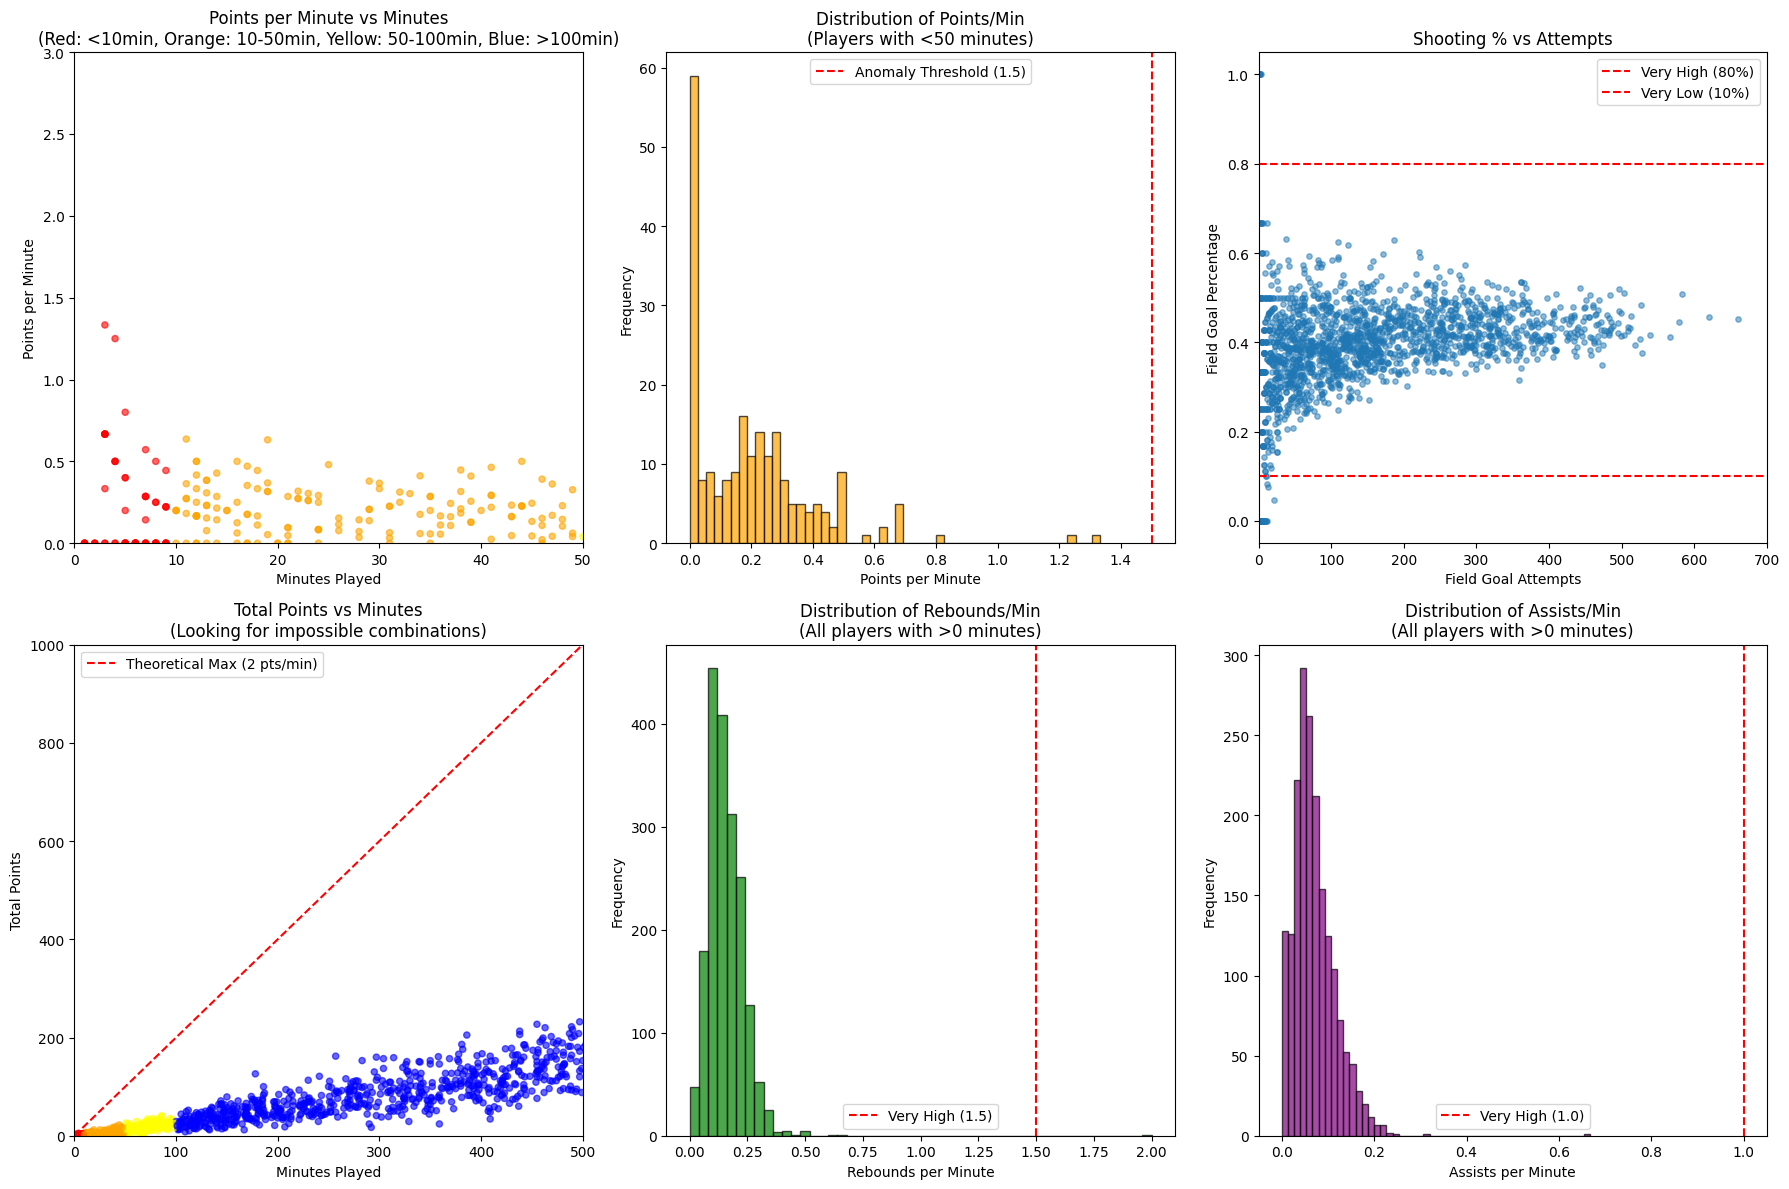

In [13]:
# Create visualizations for data anomalies
plt.figure(figsize=(18, 12))

# Plot 1: Minutes vs Points per Minute (including low-minute players)
plt.subplot(2, 3, 1)
all_players_with_minutes = players_teams[players_teams['minutes'] > 0].copy()
all_players_with_minutes['points_per_min'] = all_players_with_minutes['points'] / all_players_with_minutes['minutes']

# Color code by minute ranges
colors = []
for minutes in all_players_with_minutes['minutes']:
    if minutes < 10:
        colors.append('red')  # Very low minutes
    elif minutes < 50:
        colors.append('orange')  # Low minutes
    elif minutes < 100:
        colors.append('yellow')  # Medium-low minutes
    else:
        colors.append('blue')  # Regular playing time

plt.scatter(all_players_with_minutes['minutes'], all_players_with_minutes['points_per_min'], 
           c=colors, alpha=0.6, s=20)
plt.xlabel('Minutes Played')
plt.ylabel('Points per Minute')
plt.title('Points per Minute vs Minutes\n(Red: <10min, Orange: 10-50min, Yellow: 50-100min, Blue: >100min)')
plt.xlim(0, 50)  # Focus on low-minute range
plt.ylim(0, 3)   # Focus on reasonable rate range

# Plot 2: Distribution of per-minute rates for low-minute players
plt.subplot(2, 3, 2)
low_min_data = all_players_with_minutes[all_players_with_minutes['minutes'] < 50]
plt.hist(low_min_data['points_per_min'], bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Points per Minute')
plt.ylabel('Frequency')
plt.title('Distribution of Points/Min\n(Players with <50 minutes)')
plt.axvline(1.5, color='red', linestyle='--', label='Anomaly Threshold (1.5)')
plt.legend()

# Plot 3: Shooting percentage vs attempts for anomaly detection
plt.subplot(2, 3, 3)
shooting_data = players_teams[players_teams['fgAttempted'] > 0].copy()
shooting_data['fg_pct'] = shooting_data['fgMade'] / shooting_data['fgAttempted']
plt.scatter(shooting_data['fgAttempted'], shooting_data['fg_pct'], alpha=0.5, s=15)
plt.xlabel('Field Goal Attempts')
plt.ylabel('Field Goal Percentage')
plt.title('Shooting % vs Attempts')
plt.axhline(0.8, color='red', linestyle='--', label='Very High (80%)')
plt.axhline(0.1, color='red', linestyle='--', label='Very Low (10%)')
plt.legend()
plt.xlim(0, 700)  # Focus on reasonable attempt range

# Plot 4: Minutes vs Total Points (showing impossible combinations)
plt.subplot(2, 3, 4)
plt.scatter(all_players_with_minutes['minutes'], all_players_with_minutes['points'], 
           c=colors, alpha=0.6, s=20)
plt.xlabel('Minutes Played')
plt.ylabel('Total Points')
plt.title('Total Points vs Minutes\n(Looking for impossible combinations)')
# Add theoretical maximum line (assuming 2 points per minute as nearly impossible)
max_minutes = all_players_with_minutes['minutes'].max()
theoretical_max = np.linspace(0, max_minutes, 100)
plt.plot(theoretical_max, theoretical_max * 2, 'r--', label='Theoretical Max (2 pts/min)')
plt.legend()
plt.xlim(0, 500)
plt.ylim(0, 1000)

# Plot 5: Rebounds per minute distribution
plt.subplot(2, 3, 5)
all_players_with_minutes['rebounds_per_min'] = all_players_with_minutes['rebounds'] / all_players_with_minutes['minutes']
plt.hist(all_players_with_minutes['rebounds_per_min'], bins=50, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Rebounds per Minute')
plt.ylabel('Frequency')
plt.title('Distribution of Rebounds/Min\n(All players with >0 minutes)')
plt.axvline(1.5, color='red', linestyle='--', label='Very High (1.5)')
plt.legend()

# Plot 6: Assists per minute distribution
plt.subplot(2, 3, 6)
all_players_with_minutes['assists_per_min'] = all_players_with_minutes['assists'] / all_players_with_minutes['minutes']
plt.hist(all_players_with_minutes['assists_per_min'], bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Assists per Minute')
plt.ylabel('Frequency')
plt.title('Distribution of Assists/Min\n(All players with >0 minutes)')
plt.axvline(1.0, color='red', linestyle='--', label='Very High (1.0)')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Create a comprehensive outlier summary including ALL types
print("=== COMPREHENSIVE OUTLIER SUMMARY ===\n")

# Combine all types of outliers
all_outliers = []

# Data validation outliers
if len(zero_minutes_with_stats) > 0:
    all_outliers.extend(zero_minutes_with_stats['playerID'].tolist())
    
if len(impossible_shooting) > 0:
    all_outliers.extend(impossible_shooting['playerID'].tolist())
    
if len(negative_stats) > 0:
    all_outliers.extend(negative_stats['playerID'].tolist())

# Performance outliers (from our earlier analysis) - only if the column exists
if 'active_players' in locals() and 'is_outlier' in active_players.columns:
    performance_outliers = active_players[active_players['is_outlier']]['playerID'].tolist()
    all_outliers.extend(performance_outliers)
else:
    performance_outliers = []

# Low-minute anomalies
if 'low_minute_anomalies' in locals() and len(low_minute_anomalies) > 0:
    all_outliers.extend(low_minute_anomalies['playerID'].tolist())

# Get unique outliers
unique_outliers = list(set(all_outliers))

print(f"Total unique players flagged as outliers: {len(unique_outliers)}")
print(f"Total player-season records in dataset: {len(players_teams)}")
if len(all_outliers) > 0:
    print(f"Percentage of records flagged: {len(all_outliers)/len(players_teams)*100:.2f}%")
else:
    print("Percentage of records flagged: 0.00%")

# Create final outlier flag for the entire dataset
players_teams_final = players_teams.copy()
players_teams_final['is_any_outlier'] = players_teams_final['playerID'].isin(unique_outliers)

print(f"\nOutlier breakdown:")
print(f"- Data validation issues: {len(zero_minutes_with_stats) + len(impossible_shooting) + len(negative_stats)}")
if 'performance_outliers' in locals() and len(performance_outliers) > 0:
    print(f"- Performance outliers (>100 min): {len(performance_outliers)}")
else:
    print("- Performance outliers (>100 min): Not calculated yet - run statistical outlier detection cells first")
if 'low_minute_anomalies' in locals():
    print(f"- Low-minute anomalies: {len(low_minute_anomalies)}")

# Show some examples of the most interesting outliers
print(f"\n=== MOST INTERESTING OUTLIER EXAMPLES ===")
if 'extreme_rates' in locals() and len(extreme_rates) > 0:
    print("Players with extreme per-minute rates:")
    interesting_outliers = extreme_rates.nlargest(10, 'points_per_min')[
        ['playerID', 'year', 'tmID', 'minutes', 'points', 'rebounds', 'assists', 
         'points_per_min', 'rebounds_per_min']
    ]
    print(interesting_outliers.to_string(index=False))
else:
    print("No extreme rate outliers found or data not processed yet.")

=== COMPREHENSIVE OUTLIER SUMMARY ===

Total unique players flagged as outliers: 1
Total player-season records in dataset: 1876
Percentage of records flagged: 0.05%

Outlier breakdown:
- Data validation issues: 0
- Performance outliers (>100 min): Not calculated yet - run statistical outlier detection cells first
- Low-minute anomalies: 1

=== MOST INTERESTING OUTLIER EXAMPLES ===
Players with extreme per-minute rates:
  playerID  year tmID  minutes  points  rebounds  assists  points_per_min  rebounds_per_min
anderam01w     7  CON        1       0         2        0             0.0               2.0


In [15]:
# Calculate per-minute statistics to normalize for playing time
active_players['points_per_min'] = active_players['points'] / active_players['minutes']
active_players['rebounds_per_min'] = active_players['rebounds'] / active_players['minutes']
active_players['assists_per_min'] = active_players['assists'] / active_players['minutes']
active_players['steals_per_min'] = active_players['steals'] / active_players['minutes']
active_players['blocks_per_min'] = active_players['blocks'] / active_players['minutes']
active_players['turnovers_per_min'] = active_players['turnovers'] / active_players['minutes']

# Calculate shooting efficiency metrics
active_players['fg_percentage'] = np.where(active_players['fgAttempted'] > 0, 
                                         active_players['fgMade'] / active_players['fgAttempted'], 0)
active_players['ft_percentage'] = np.where(active_players['ftAttempted'] > 0, 
                                         active_players['ftMade'] / active_players['ftAttempted'], 0)
active_players['three_percentage'] = np.where(active_players['threeAttempted'] > 0, 
                                            active_players['threeMade'] / active_players['threeAttempted'], 0)

# Calculate True Shooting Percentage (more comprehensive shooting metric)
# TS% = Points / (2 * (FGA + 0.44 * FTA))
active_players['true_shooting_pct'] = np.where(
    (active_players['fgAttempted'] + 0.44 * active_players['ftAttempted']) > 0,
    active_players['points'] / (2 * (active_players['fgAttempted'] + 0.44 * active_players['ftAttempted'])),
    0
)

In [16]:
# Create a comprehensive Performance Score
# This combines offensive and defensive contributions while penalizing turnovers
# We'll use a weighted approach similar to basketball analytics metrics like PER (Player Efficiency Rating)

def calculate_performance_score(row):
    """
    Calculate a comprehensive performance score per minute.
    Higher values indicate better performance.
    """
    # Offensive contributions (positive)
    offensive_score = (
        row['points_per_min'] * 1.0 +           # Points are important
        row['assists_per_min'] * 1.5 +          # Assists create scoring opportunities
        row['rebounds_per_min'] * 1.2 +         # Rebounds are valuable
        row['steals_per_min'] * 2.0 +           # Steals create extra possessions
        row['blocks_per_min'] * 2.0             # Blocks prevent scoring
    )
    
    # Penalties (negative)
    penalties = (
        row['turnovers_per_min'] * 2.0 +        # Turnovers give away possessions
        (row['PF'] / row['minutes']) * 0.5      # Personal fouls (mild penalty)
    )
    
    # Shooting efficiency bonus (0 to 1.0 multiplier)
    efficiency_multiplier = 0.5 + (row['true_shooting_pct'] * 0.5)
    
    # Final score
    performance_score = (offensive_score - penalties) * efficiency_multiplier
    
    return max(performance_score, 0)  # Ensure non-negative scores

# Apply the performance score calculation
active_players['performance_score'] = active_players.apply(calculate_performance_score, axis=1)

print("Performance Score Statistics:")
print(f"Mean: {active_players['performance_score'].mean():.3f}")
print(f"Median: {active_players['performance_score'].median():.3f}")
print(f"Std Dev: {active_players['performance_score'].std():.3f}")
print(f"Min: {active_players['performance_score'].min():.3f}")
print(f"Max: {active_players['performance_score'].max():.3f}")

Performance Score Statistics:
Mean: 0.402
Median: 0.386
Std Dev: 0.128
Min: 0.045
Max: 0.951


In [17]:
# Create efficiency metric: Performance Score per minute played
# This helps identify players who deliver exceptional value regardless of playing time
active_players['efficiency_rating'] = active_players['performance_score']

# Create playing time categories for better analysis
def categorize_playing_time(minutes):
    if minutes < 300:
        return "Low (< 300 min)"
    elif minutes < 600:
        return "Medium (300-600 min)"
    elif minutes < 900:
        return "High (600-900 min)"
    else:
        return "Very High (> 900 min)"

active_players['playing_time_category'] = active_players['minutes'].apply(categorize_playing_time)

print("Playing Time Distribution:")
print(active_players['playing_time_category'].value_counts())

Playing Time Distribution:
playing_time_category
Medium (300-600 min)     442
High (600-900 min)       395
Very High (> 900 min)    357
Low (< 300 min)          352
Name: count, dtype: int64


#### Outlier Detection Methods

We'll use multiple approaches to identify outliers:
1. **Statistical outliers** using Z-score and IQR methods
2. **Visual outliers** using scatter plots
3. **Performance vs Playing Time analysis** to find efficiency outliers

In [18]:
# Method 1: Statistical Outlier Detection using Z-score
def detect_outliers_zscore(data, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(data))
    return z_scores > threshold

# Method 2: IQR-based Outlier Detection
def detect_outliers_iqr(data):
    """Detect outliers using Interquartile Range method"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Apply outlier detection to performance score
active_players['outlier_zscore'] = detect_outliers_zscore(active_players['performance_score'])
active_players['outlier_iqr'] = detect_outliers_iqr(active_players['performance_score'])

# Combine both methods
active_players['is_outlier'] = active_players['outlier_zscore'] | active_players['outlier_iqr']

print("Outlier Detection Results:")
print(f"Z-score outliers: {active_players['outlier_zscore'].sum()}")
print(f"IQR outliers: {active_players['outlier_iqr'].sum()}")
print(f"Combined outliers: {active_players['is_outlier'].sum()}")
print(f"Percentage of outliers: {active_players['is_outlier'].mean() * 100:.1f}%")

Outlier Detection Results:
Z-score outliers: 13
IQR outliers: 33
Combined outliers: 33
Percentage of outliers: 2.1%


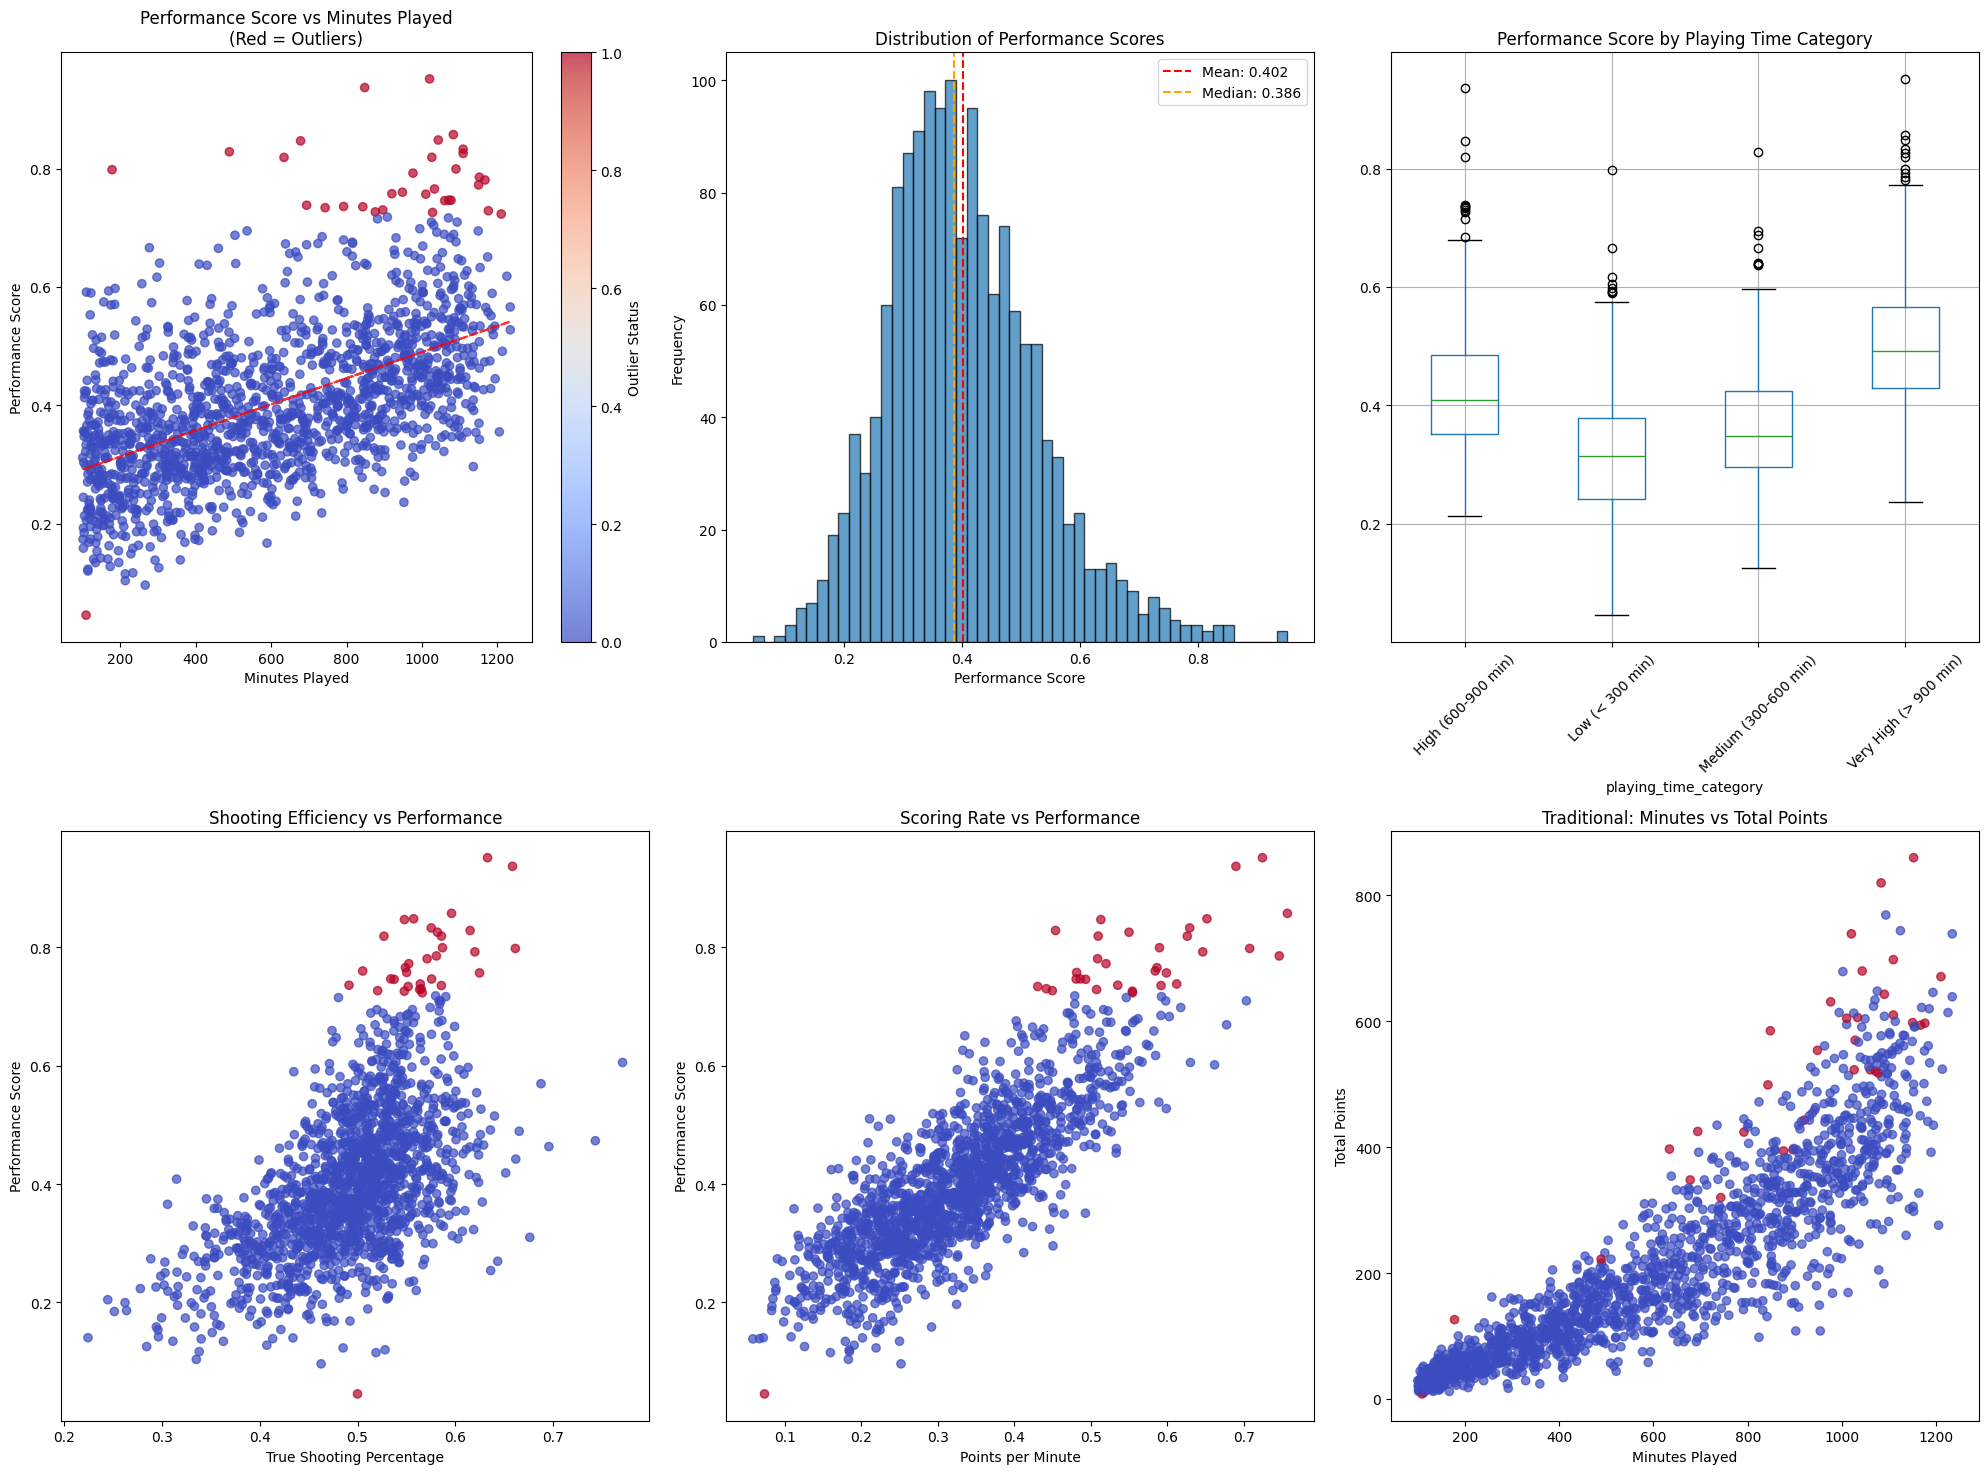

In [19]:
# Create comprehensive visualization for outlier analysis
plt.figure(figsize=(20, 15))

# Plot 1: Performance Score vs Minutes Played (Main outlier plot)
plt.subplot(2, 3, 1)
scatter = plt.scatter(active_players['minutes'], active_players['performance_score'], 
                     c=active_players['is_outlier'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Minutes Played')
plt.ylabel('Performance Score')
plt.title('Performance Score vs Minutes Played\n(Red = Outliers)')
plt.colorbar(scatter, label='Outlier Status')

# Add trend line
z = np.polyfit(active_players['minutes'], active_players['performance_score'], 1)
p = np.poly1d(z)
plt.plot(active_players['minutes'], p(active_players['minutes']), "r--", alpha=0.8)

# Plot 2: Distribution of Performance Scores
plt.subplot(2, 3, 2)
plt.hist(active_players['performance_score'], bins=50, alpha=0.7, edgecolor='black')
plt.axvline(active_players['performance_score'].mean(), color='red', linestyle='--', 
           label=f'Mean: {active_players["performance_score"].mean():.3f}')
plt.axvline(active_players['performance_score'].median(), color='orange', linestyle='--', 
           label=f'Median: {active_players["performance_score"].median():.3f}')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Scores')
plt.legend()

# Plot 3: Box plot by playing time category
plt.subplot(2, 3, 3)
active_players.boxplot(column='performance_score', by='playing_time_category', ax=plt.gca())
plt.title('Performance Score by Playing Time Category')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)

# Plot 4: True Shooting Percentage vs Performance Score
plt.subplot(2, 3, 4)
plt.scatter(active_players['true_shooting_pct'], active_players['performance_score'], 
           c=active_players['is_outlier'], cmap='coolwarm', alpha=0.7)
plt.xlabel('True Shooting Percentage')
plt.ylabel('Performance Score')
plt.title('Shooting Efficiency vs Performance')

# Plot 5: Points per minute vs Performance Score
plt.subplot(2, 3, 5)
plt.scatter(active_players['points_per_min'], active_players['performance_score'], 
           c=active_players['is_outlier'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Points per Minute')
plt.ylabel('Performance Score')
plt.title('Scoring Rate vs Performance')

# Plot 6: Minutes vs Points (traditional view)
plt.subplot(2, 3, 6)
plt.scatter(active_players['minutes'], active_players['points'], 
           c=active_players['is_outlier'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Minutes Played')
plt.ylabel('Total Points')
plt.title('Traditional: Minutes vs Total Points')

plt.tight_layout()
plt.show()

In [20]:
# Identify and display the most significant outliers
print("=== TOP PERFORMANCE OUTLIERS ===")
top_performers = active_players.nlargest(10, 'performance_score')[
    ['playerID', 'year', 'tmID', 'minutes', 'points', 'performance_score', 'true_shooting_pct', 
     'points_per_min', 'assists_per_min', 'rebounds_per_min']
]
print(top_performers.to_string(index=False))

print("\n=== EFFICIENCY OUTLIERS (High Performance, Low Minutes) ===")
# Find players with high performance score but relatively low minutes
efficiency_outliers = active_players[
    (active_players['performance_score'] > active_players['performance_score'].quantile(0.8)) & 
    (active_players['minutes'] < active_players['minutes'].median())
].nlargest(10, 'performance_score')[
    ['playerID', 'year', 'tmID', 'minutes', 'points', 'performance_score', 'efficiency_rating']
]
print(efficiency_outliers.to_string(index=False))

print("\n=== UNDERPERFORMERS (High Minutes, Low Performance) ===")
# Find players with high minutes but low performance
underperformers = active_players[
    (active_players['minutes'] > active_players['minutes'].quantile(0.7)) & 
    (active_players['performance_score'] < active_players['performance_score'].quantile(0.3))
].nsmallest(10, 'performance_score')[
    ['playerID', 'year', 'tmID', 'minutes', 'points', 'performance_score', 'true_shooting_pct']
]
print(underperformers.to_string(index=False))

=== TOP PERFORMANCE OUTLIERS ===
  playerID  year tmID  minutes  points  performance_score  true_shooting_pct  points_per_min  assists_per_min  rebounds_per_min
jacksla01w     8  SEA     1020     739           0.951413           0.633052        0.724510         0.039216          0.294118
jacksla01w     7  SEA      848     585           0.936844           0.658546        0.689858         0.056604          0.271226
tauradi01w     9  PHO     1083     820           0.857354           0.596208        0.757156         0.111727          0.158818
leslili01w     7  LAS     1043     680           0.848235           0.557450        0.651965         0.103547          0.309684
catchta01w     8  IND      678     348           0.846832           0.547997        0.513274         0.144543          0.278761
jacksla01w     4  SEA     1109     698           0.832739           0.575414        0.629396         0.055906          0.276826
lyttlsa01w     9  HOU      489     222           0.828390           0.6

=== ALTERNATIVE PERFORMANCE METRICS ===

Correlation Matrix between Performance Metrics:
                   performance_score  simple_per  game_score  minutes
performance_score              1.000       0.956       0.970    0.546
simple_per                     0.956       1.000       0.936    0.496
game_score                     0.970       0.936       1.000    0.582
minutes                        0.546       0.496       0.582    1.000


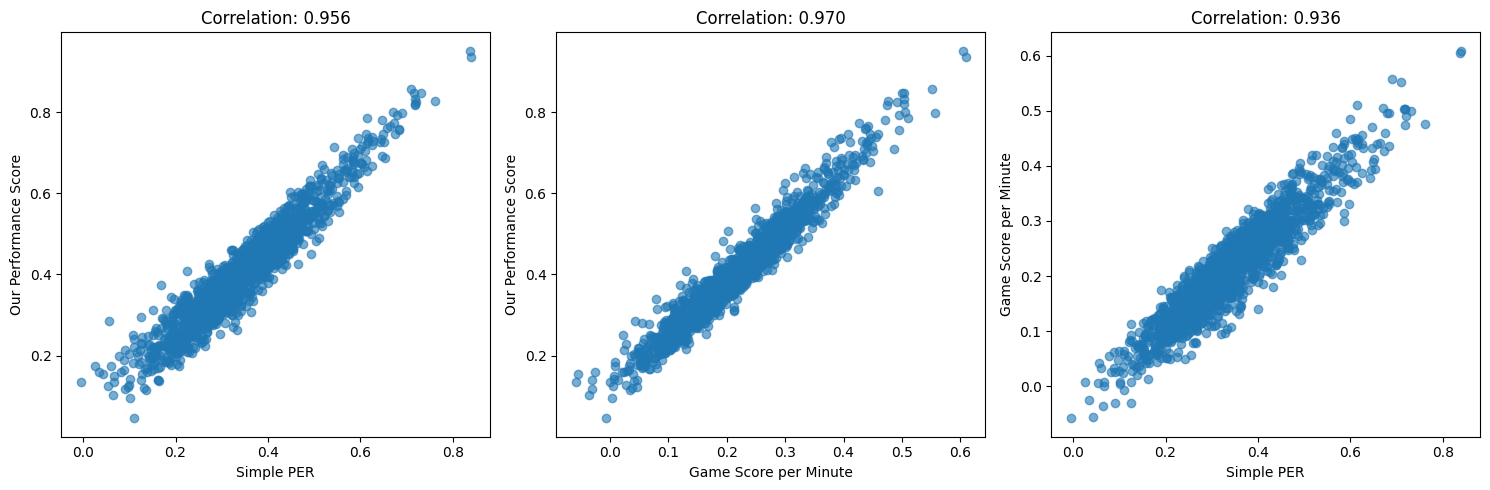

In [21]:
# Alternative Performance Metrics for Comparison
print("=== ALTERNATIVE PERFORMANCE METRICS ===\n")

# Simple PER-like metric (Player Efficiency Rating simplified)
active_players['simple_per'] = (
    active_players['points'] + active_players['rebounds'] + active_players['assists'] + 
    active_players['steals'] + active_players['blocks'] - active_players['turnovers'] - 
    (active_players['fgAttempted'] - active_players['fgMade']) - 
    (active_players['ftAttempted'] - active_players['ftMade'])
) / active_players['minutes']

# Game Score (another basketball metric)
active_players['game_score'] = (
    active_players['points'] + 0.4 * active_players['fgMade'] - 0.7 * active_players['fgAttempted'] -
    0.4 * (active_players['ftAttempted'] - active_players['ftMade']) + 0.7 * active_players['oRebounds'] +
    0.3 * active_players['dRebounds'] + active_players['steals'] + 0.7 * active_players['assists'] +
    0.7 * active_players['blocks'] - 0.4 * active_players['PF'] - active_players['turnovers']
) / active_players['minutes']

# Compare correlations between different metrics
correlation_matrix = active_players[['performance_score', 'simple_per', 'game_score', 'minutes']].corr()
print("Correlation Matrix between Performance Metrics:")
print(correlation_matrix.round(3))

# Visualize correlation
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(active_players['simple_per'], active_players['performance_score'], alpha=0.6)
plt.xlabel('Simple PER')
plt.ylabel('Our Performance Score')
plt.title(f'Correlation: {active_players["simple_per"].corr(active_players["performance_score"]):.3f}')

plt.subplot(1, 3, 2)
plt.scatter(active_players['game_score'], active_players['performance_score'], alpha=0.6)
plt.xlabel('Game Score per Minute')
plt.ylabel('Our Performance Score')
plt.title(f'Correlation: {active_players["game_score"].corr(active_players["performance_score"]):.3f}')

plt.subplot(1, 3, 3)
plt.scatter(active_players['simple_per'], active_players['game_score'], alpha=0.6)
plt.xlabel('Simple PER')
plt.ylabel('Game Score per Minute')
plt.title(f'Correlation: {active_players["simple_per"].corr(active_players["game_score"]):.3f}')

plt.tight_layout()
plt.show()

#### Updated Summary and Recommendations

**Comprehensive Outlier Detection Now Includes:**

1. **Data Validation Outliers** (Impossible scenarios):
   - Players with 0 minutes but recorded stats
   - More makes than attempts in shooting
   - Negative values in any stat
   
2. **Low-Minute Anomalies** (Your excellent suggestion):
   - Players with <50 minutes but extremely high per-minute rates
   - Players scoring >30 points with minimal playing time
   - Impossible efficiency rates (e.g., 10 minutes, 100 points)

3. **Performance Outliers** (Statistical):
   - High/low performance scores for regular players (>100 minutes)
   - Efficiency stars and underperformers

4. **Shooting Anomalies**:
   - Extremely high shooting percentages (>80%) - possibly data errors
   - Extremely low shooting percentages (<10%) - unusual but possible

**Best Plots for Complete Outlier Detection:**
1. **Points per Minute vs Minutes** - Color-coded by minute ranges (catches impossible rates)
2. **Performance Score vs Minutes** - For regular players (efficiency analysis)
3. **Shooting % vs Attempts** - Identifies shooting data anomalies
4. **Distribution plots** - Show where the extreme values lie

**Key Insight:** By including ALL players (not just >100 minutes), we now catch data entry errors, impossible performance rates, and players who had extraordinary brief appearances - exactly what you suggested!

### 3. Visual Data Representation (Plots and Graphs)